<a href="https://colab.research.google.com/github/chandaku/machine-learning/blob/main/ml_homework_chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!wget -P /content/drive/My\ Drive/ckumar/ml-learning https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 13:49:50--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘/content/drive/My Drive/ckumar/ml-learning/housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.02s   

2023-09-25 13:49:50 (60.9 MB/s) - ‘/content/drive/My Drive/ckumar/ml-learning/housing.csv.1’ saved [1423529/1423529]



In [121]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/My Drive/ckumar/ml-learning/housing.csv')
df = df[(df.ocean_proximity== '<1H OCEAN') | (df.ocean_proximity== 'INLAND')]

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [122]:
#Finding missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [26]:
#median population
df.population.median()

1195.0

In [112]:
# use only 'latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'
base = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
f = df[base]
df = df.fillna(0)

In [32]:
# Data Preparation
num_rows = len(df)
num_rows
n_val = int(num_rows * 0.2)
n_test = int(num_rows * 0.2)
n_train = num_rows - n_val - n_test
total = n_train + n_val + n_test
num_rows, n_train, n_val, n_test, total


(15687, 9413, 3137, 3137, 15687)

In [74]:
import numpy as np
idx = np.arange(num_rows)

np.random.seed(42)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
20157,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080,297900.0
20005,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,40900.0
6691,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546,500001.0
3470,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0


In [76]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
y_train, y_val, y_test

(array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
        12.11888489, 12.52924613]),
 array([11.3095968 , 12.27326857, 11.95247633, ..., 12.53968723,
        12.34279083, 11.97477721]),
 array([11.90969286, 12.16733701, 12.39338589, ..., 12.3647886 ,
        11.33141558, 12.50766132]))

In [92]:
df_train.iloc[10]

latitude                 36.320
longitude              -119.340
housing_median_age       14.000
total_rooms            1204.000
total_bedrooms          227.000
population              633.000
households              247.000
median_income             3.925
median_house_value    83800.000
Name: 19921, dtype: float64

In [93]:
def prepare_X(df, fill_with=0):
  df_num = df[base]
  df_num = df_num.fillna(fill_with)
  X = df_num.values
  return X

In [94]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)
  return w_full[0], w_full[1:]


In [95]:
mean = df_train['total_bedrooms'].mean()
mean

542.552956325786

In [96]:
def rmse(y, y_pred):
  diff = y-y_pred
  se = diff ** 2
  meansq = se.mean()
  return np.sqrt(meansq)


<Axes: ylabel='Count'>

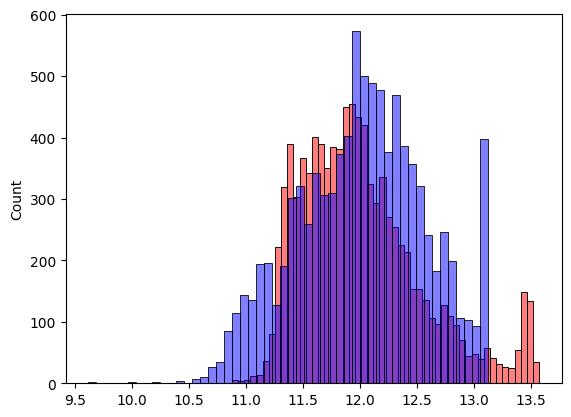

In [97]:
X_train = prepare_X(df_train, mean)
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
w0, w
y_pred = w0 + X_train.dot(w)
y_pred

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.histplot(y_pred, color ='red', alpha = 0.5, bins =50)
sns.histplot(y_train, color ='blue', alpha = 0.5, bins =50)

<Axes: ylabel='Count'>

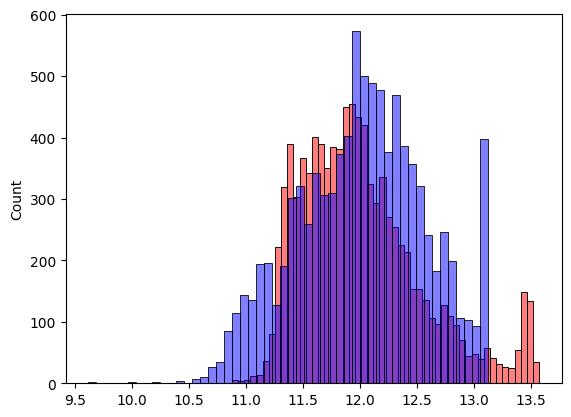

In [105]:

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
w0, w
y_pred = w0 + X_train.dot(w)
y_pred
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.histplot(y_pred, color ='red', alpha = 0.5, bins =50)
sns.histplot(y_train, color ='blue', alpha = 0.5, bins =50)

In [106]:
rmse_r = rmse(y_train, y_pred)
round(rmse_r, 2)

0.17

In [108]:
X_val = prepare_X(df_val)
X_val
y_pred_val = w0 + X_val.dot(w)
rmse_val = rmse(y_val, y_pred_val)
round(rmse_val, 2)


0.17

In [113]:
def train_linear_regression_regularized(X, y, r):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)
  return w_full[0], w_full[1:]


X_train = prepare_X(df_train)
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:

  w0, w = train_linear_regression_regularized(X_train, y_train, r)
  X_val = prepare_X(df_val)
  X_val
  y_pred_val = w0 + X_val.dot(w)
  rmse_val = rmse(y_val, y_pred_val)
  print(r, round(rmse_val, 2))

0
0.17
1e-06
0.17
0.0001
0.17
0.001
0.17
0.01
0.17
0.1
0.17
1
0.17
5
0.18
10
0.18


In [130]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/My Drive/ckumar/ml-learning/housing.csv')
df = df[(df.ocean_proximity== '<1H OCEAN') | (df.ocean_proximity== 'INLAND')]
idx = np.arange(num_rows)
df.fillna(0)
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  np.random.seed(s)
  np.random.shuffle(idx)
  df_train = df.iloc[idx[:n_train]]
  df_train = df_train.fillna(0)
  df_val = df.iloc[idx[n_train: n_train + n_val]]
  df_test = df.iloc[idx[n_train + n_val:]]
  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)
  num_rows = len(df)
  num_rows
  n_val = int(num_rows * 0.2)
  n_test = int(num_rows * 0.2)
  n_train = num_rows - n_val - n_test
  total = n_train + n_val + n_test
  X_train = prepare_X(df_train)
  w0, w = train_linear_regression(X_train, y_train)
  y_pred_val = w0 + X_val.dot(w)
  rmse_val = rmse(y_val, y_pred_val)
  print(rmse_val)
  print(round(np.std(rmse_val),3))


0.7877908750572833


TypeError: ignored